In [75]:
#!pip install xgboost
#!pip install streamlit

In [65]:
# import neccessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from joblib import dump

In [2]:
# Load dataset
df = pd.read_csv("C:\\Users\\User\\Downloads\\diabetes_prediction_dataset.csv")

# View basic information

df.info()  # Column names, data types, missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [3]:
df.head()  # First few rows

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.describe()  # Summary statistics for numerical columns

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
df.shape

(100000, 9)

In [6]:
df.info

<bound method DataFrame.info of        gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              

In [7]:
# Check for missing values

print(df.isnull().sum())  # Count of missing values per column

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


#### UNIVARIATE ANALYSIS -> Examining individual features

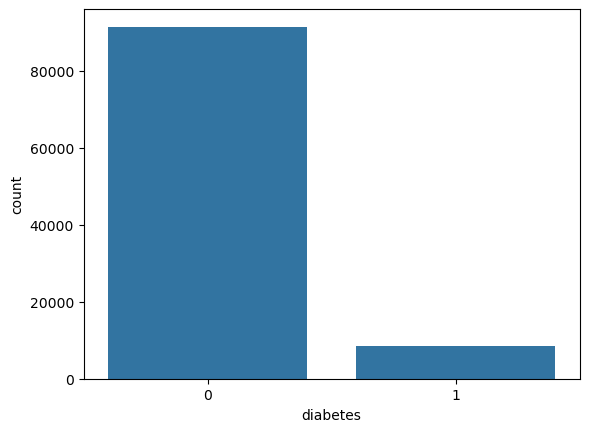

In [8]:
# Target variable  distribution
sns.countplot(x=df["diabetes"]);

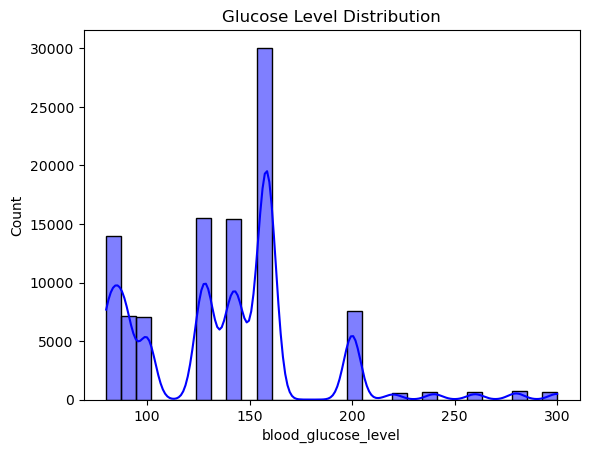

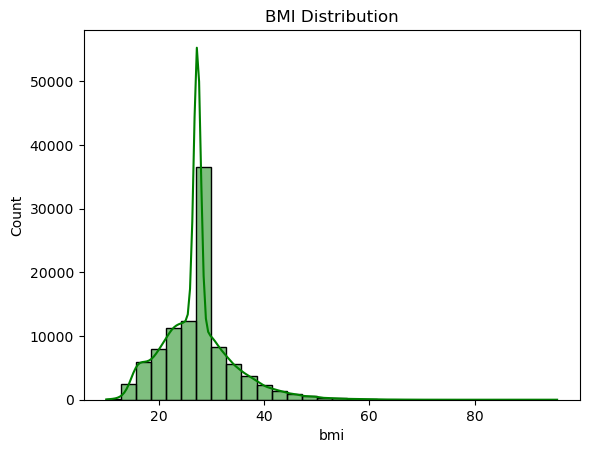

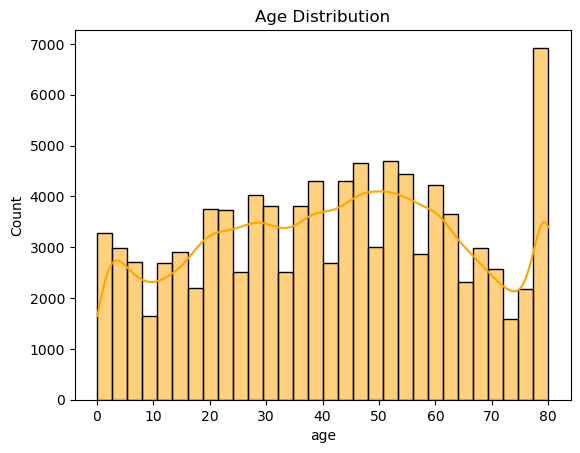

In [9]:
# Histogram of glucose levels

sns.histplot(df["blood_glucose_level"], bins=30, kde=True, color="blue")
plt.title("Glucose Level Distribution")
plt.show()

# Histogram of BMI

sns.histplot(df["bmi"], bins=30, kde=True, color="green")
plt.title("BMI Distribution")
plt.show()

# Histogram of Age

sns.histplot(df["age"], bins=30, kde=True, color="orange")
plt.title("Age Distribution")
plt.show()

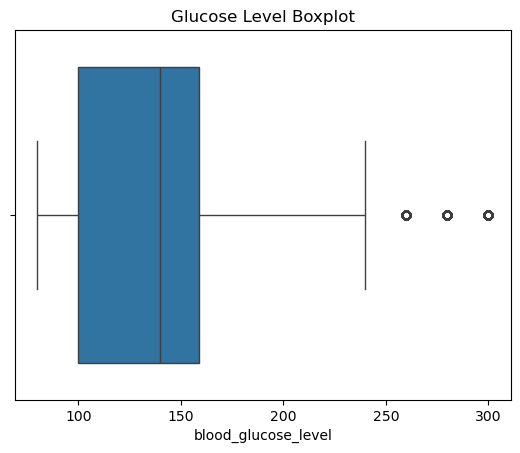

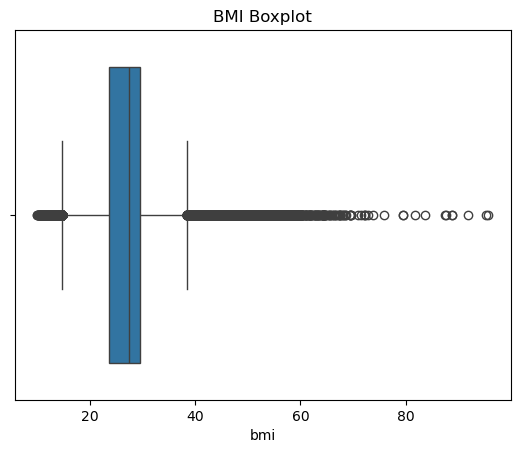

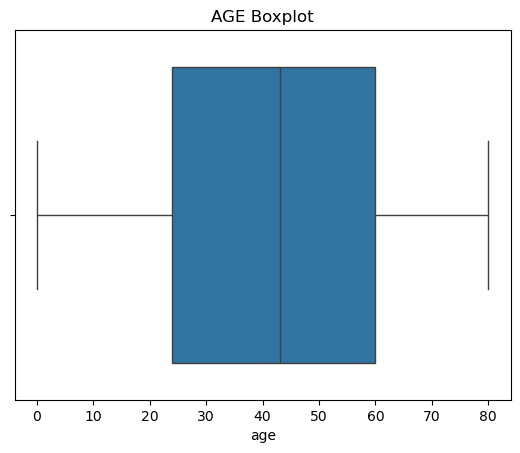

In [10]:
sns.boxplot(x=df["blood_glucose_level"])
plt.title("Glucose Level Boxplot")
plt.show()

sns.boxplot(x=df["bmi"])
plt.title("BMI Boxplot")
plt.show()

sns.boxplot(x=df["age"])
plt.title("AGE Boxplot")
plt.show()

#### BIVARIATE ANALYSIS -> Checking relationship between two variables/features

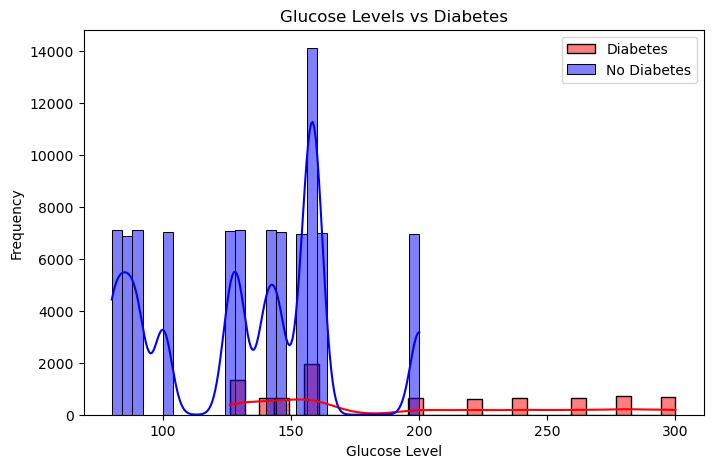

In [11]:
# Let's examine how glucose levels change between diabetic and non diabetic

plt.figure(figsize=(8, 5))
sns.histplot(df[df["diabetes"] == 1]["blood_glucose_level"], bins=30, color="red", kde=True, label="Diabetes")
sns.histplot(df[df["diabetes"] == 0]["blood_glucose_level"], bins=30, color="blue", kde=True, label="No Diabetes")
plt.legend()
plt.title("Glucose Levels vs Diabetes")
plt.xlabel("Glucose Level")
plt.ylabel("Frequency")
plt.show()

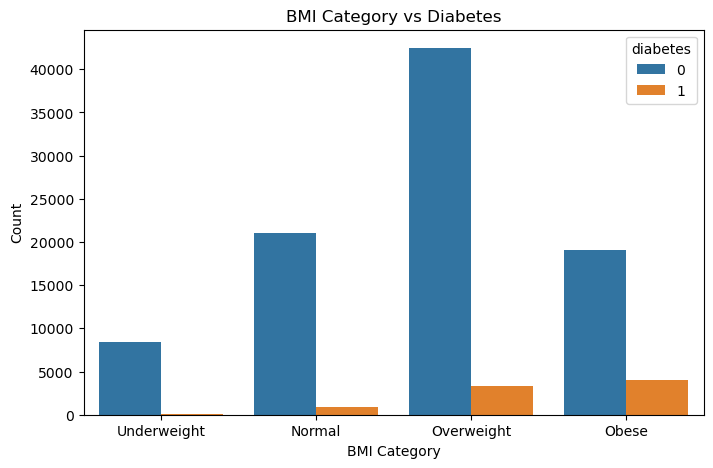

In [12]:
df["BMI_category"] = pd.cut(df["bmi"], bins=[0, 18.5, 24.9, 29.9, 50], labels=["Underweight", "Normal", "Overweight", "Obese"])

plt.figure(figsize=(8, 5))
sns.countplot(x=df["BMI_category"], hue=df["diabetes"])
plt.title("BMI Category vs Diabetes")
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.show()

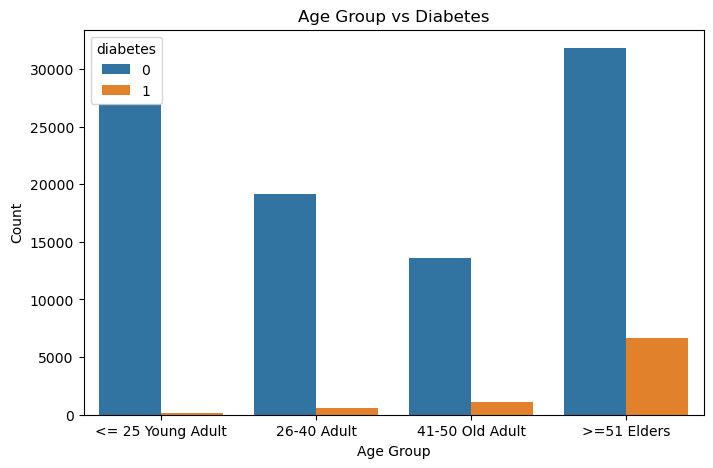

In [13]:
df["age_group"] = pd.cut(df["age"], bins=[0, 25, 40, 50, 80], labels=["<= 25 Young Adult", "26-40 Adult", "41-50 Old Adult", ">=51 Elders"])

plt.figure(figsize=(8, 5))
sns.countplot(x=df["age_group"], hue=df["diabetes"])
plt.title("Age Group vs Diabetes")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

#### MULTIVARIATE ANALYSIS -> Analyzing multiple features

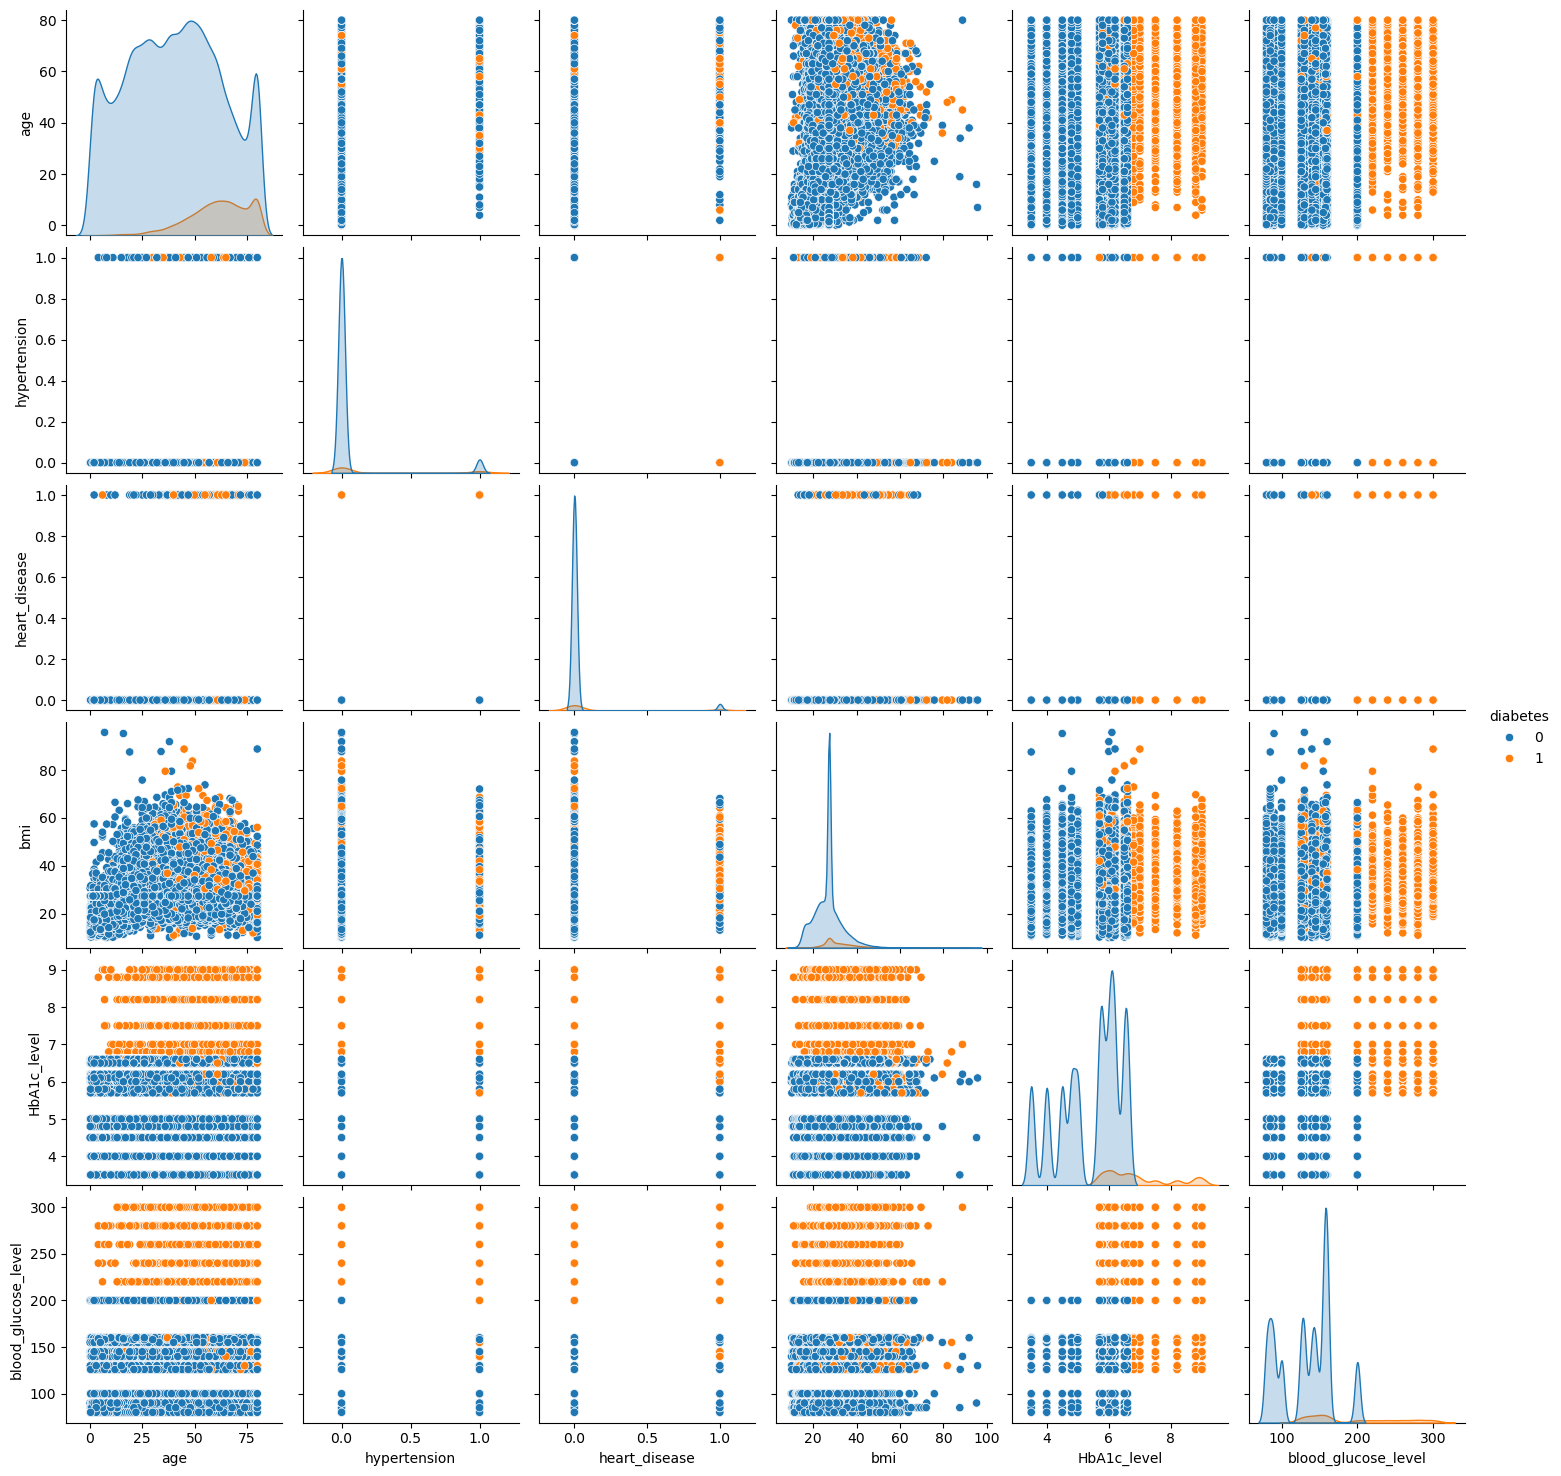

In [14]:
# Checking for relationship across multiple features

sns.pairplot(df, hue="diabetes")
plt.show()

In [15]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes', 'BMI_category',
       'age_group'],
      dtype='object')

#### DATA PRE-PROCESSING

In [16]:
label = df["diabetes"] # dependent variable

In [17]:
features = df.drop("diabetes", axis=1) # independent variables

In [18]:
df.drop("diabetes", axis=1)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,BMI_category,age_group
0,Female,80.0,0,1,never,25.19,6.6,140,Overweight,>=51 Elders
1,Female,54.0,0,0,No Info,27.32,6.6,80,Overweight,>=51 Elders
2,Male,28.0,0,0,never,27.32,5.7,158,Overweight,26-40 Adult
3,Female,36.0,0,0,current,23.45,5.0,155,Normal,26-40 Adult
4,Male,76.0,1,1,current,20.14,4.8,155,Normal,>=51 Elders
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,Overweight,>=51 Elders
99996,Female,2.0,0,0,No Info,17.37,6.5,100,Underweight,<= 25 Young Adult
99997,Male,66.0,0,0,former,27.83,5.7,155,Overweight,>=51 Elders
99998,Female,24.0,0,0,never,35.42,4.0,100,Obese,<= 25 Young Adult


In [73]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,BMI_category,age_group
0,0,80.0,0,1,4,25.19,6.6,140,2,3
1,0,54.0,0,0,0,27.32,6.6,80,2,3
2,1,28.0,0,0,4,27.32,5.7,158,2,0
3,0,36.0,0,0,1,23.45,5.0,155,0,0
4,1,76.0,1,1,1,20.14,4.8,155,0,3


#### Encoding categorical variables
Using Label Encoding

In [20]:
categorical_data = df.select_dtypes(include=['object','category'])

In [21]:
categorical_data.head()

,gender,smoking_history,BMI_category,age_group
0,Female,never,Overweight,>=51 Elders
1,Female,No Info,Overweight,>=51 Elders
2,Male,never,Overweight,26-40 Adult
3,Female,current,Normal,26-40 Adult
4,Male,current,Normal,>=51 Elders


In [23]:
# Let's convert categorical features into numerical features

encoder = LabelEncoder()

In [24]:
for column_name in categorical_data:
    features[column_name] = encoder.fit_transform(df[column_name])

In [74]:
features.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,BMI_category,age_group
0,0,80.0,0,1,4,25.19,6.6,140,2,3
1,0,54.0,0,0,0,27.32,6.6,80,2,3
2,1,28.0,0,0,4,27.32,5.7,158,2,0
3,0,36.0,0,0,1,23.45,5.0,155,0,0
4,1,76.0,1,1,1,20.14,4.8,155,0,3


#### SUPERVISED MACHINE LEARNING 

Logistics Regression

In [26]:
# Split into training (80%) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [37]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0    0.94645   0.97966   0.96277     18292
           1    0.65103   0.40632   0.50036      1708

    accuracy                        0.93070     20000
   macro avg    0.79874   0.69299   0.73156     20000
weighted avg    0.92122   0.93070   0.92328     20000



C:\Users\User\anaconda3.12\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


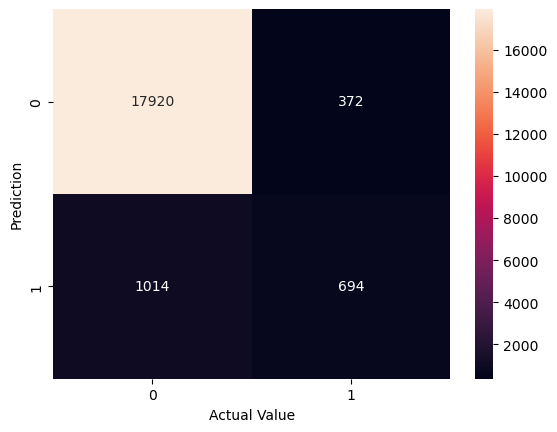

In [38]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

In [45]:
len(df.select_dtypes(include="number").columns)

7

### Lets improve model performance by scaling the data

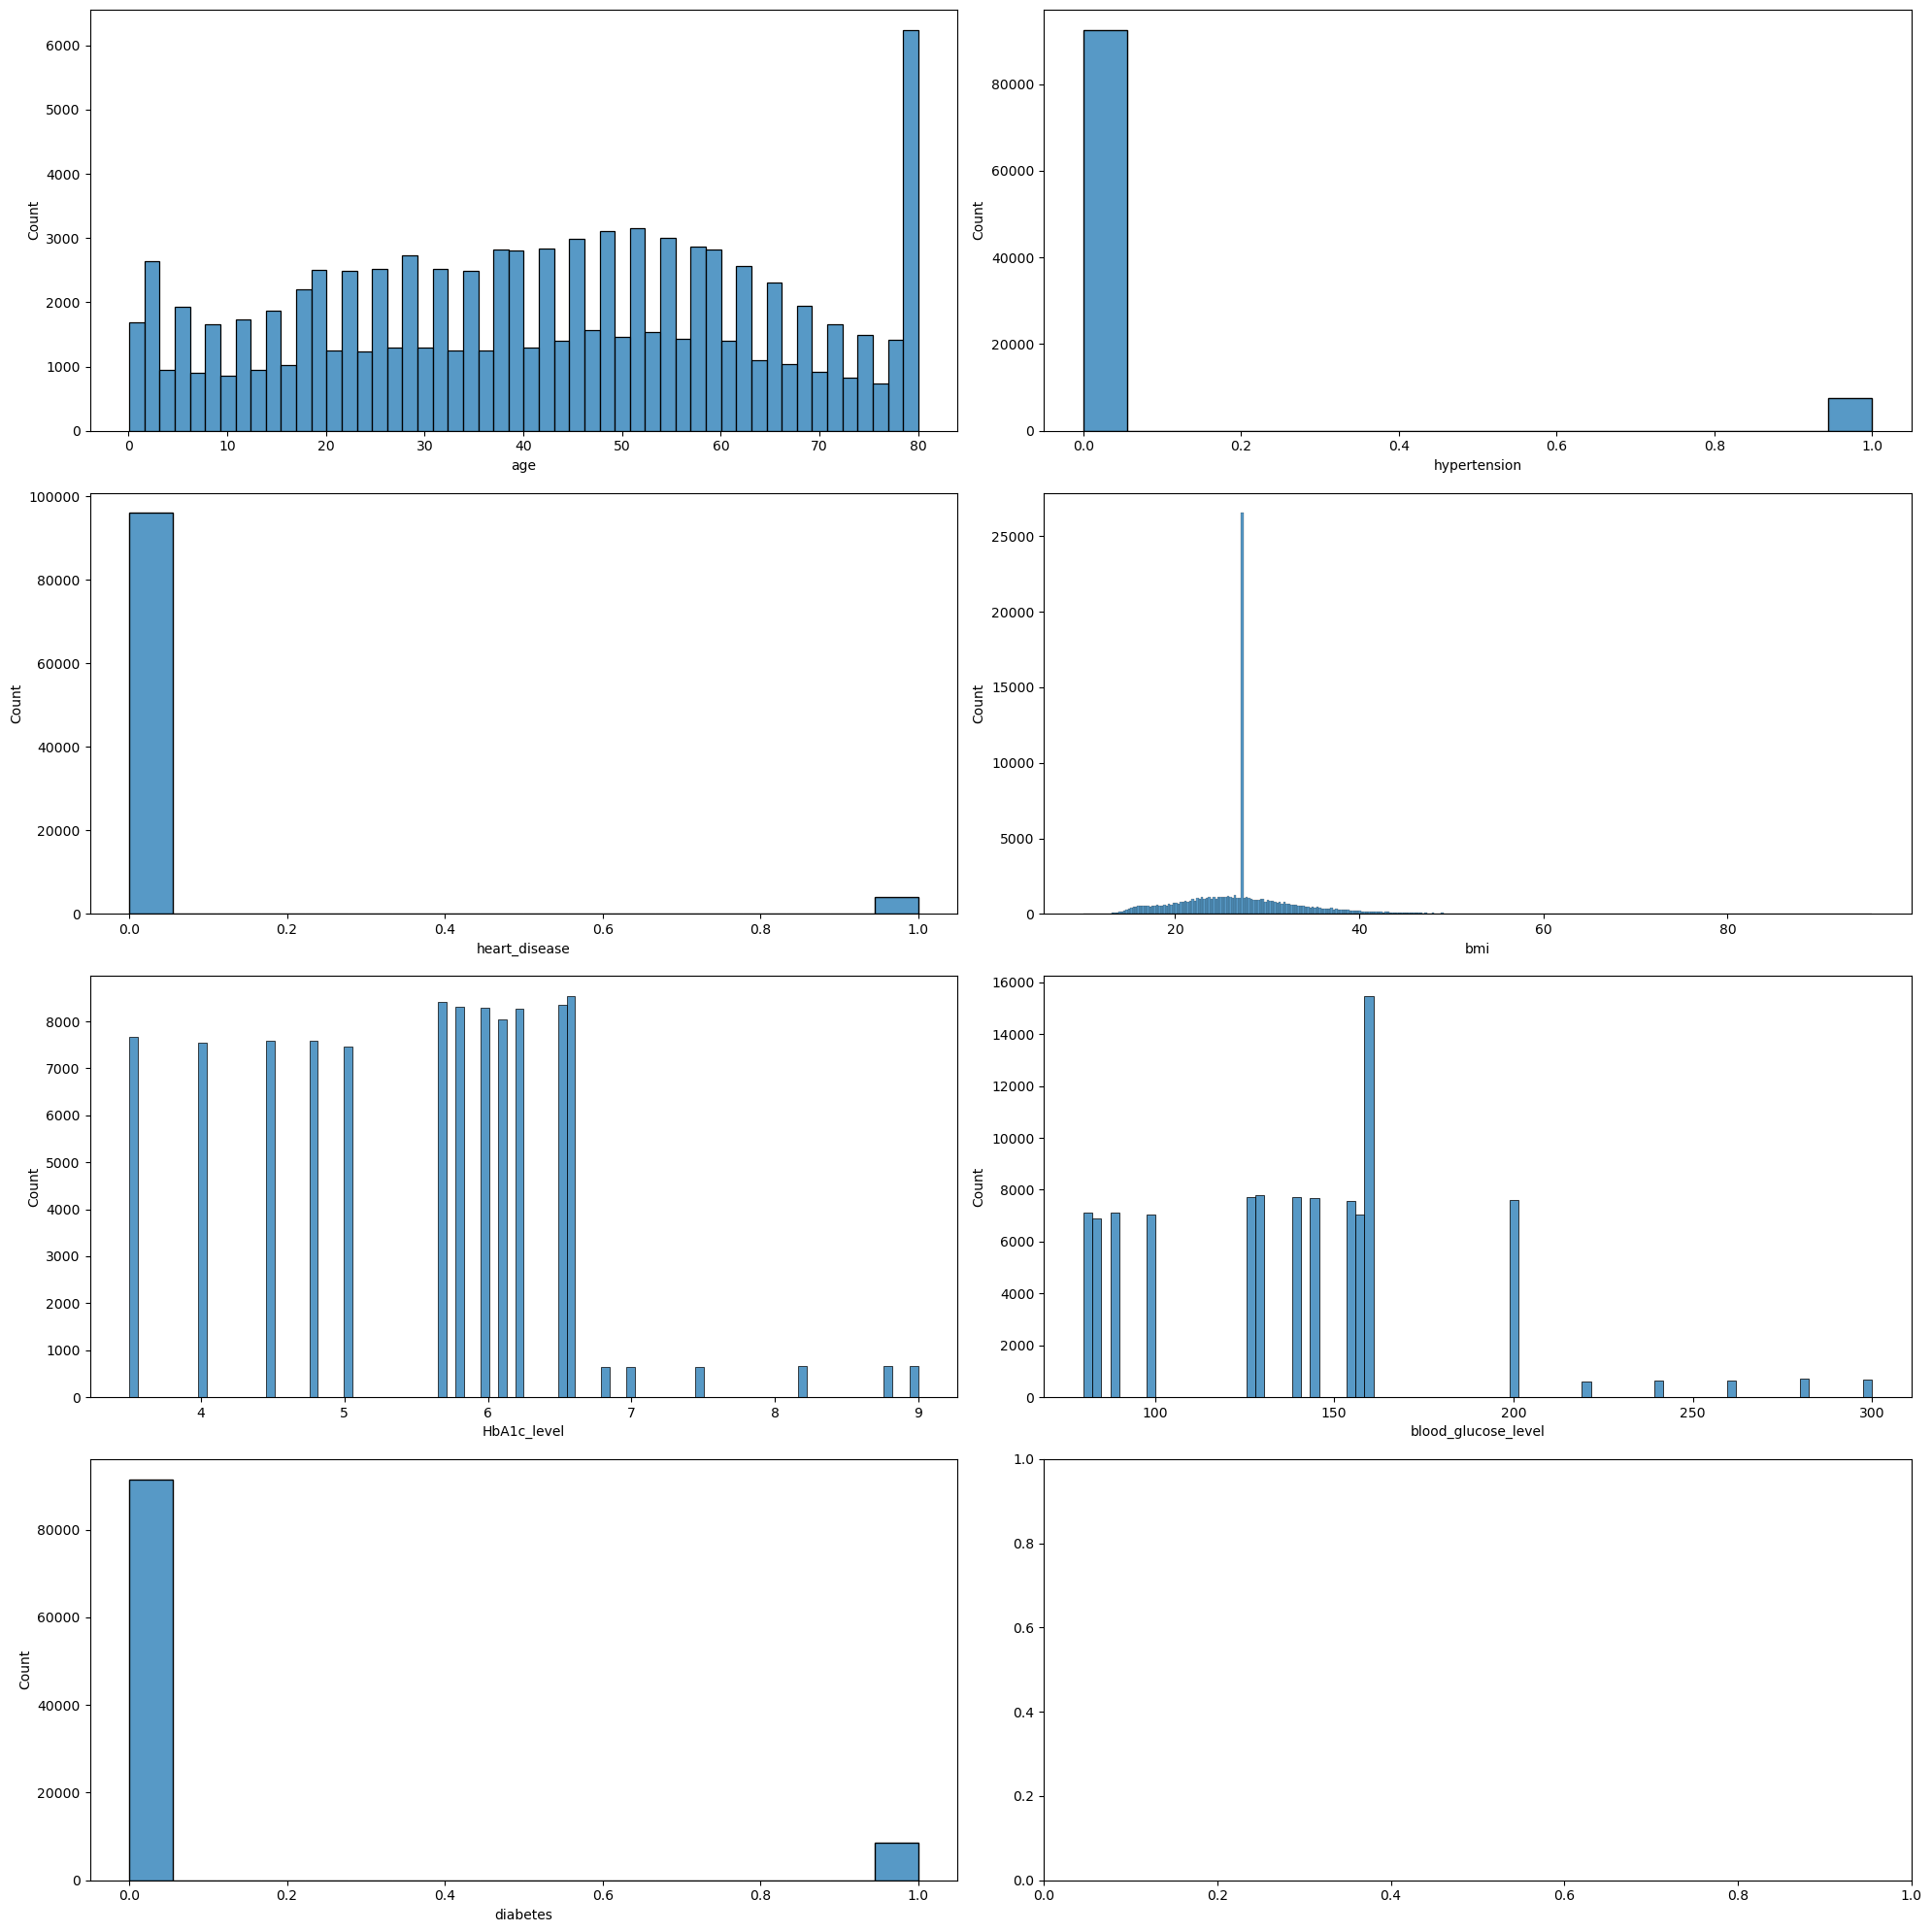

In [51]:
fig, position = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
position = position.flatten()

for index, column_name in enumerate(df.select_dtypes(include="number")):
    sns.histplot(df[column_name], ax=position[index])
plt.tight_layout()
plt.show()

#### Because our data is normal/ slightly skewed we'll use a StandardScaler.

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
predictions = model.predict(X_test_scaled)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0    0.96472   0.99109   0.97773     18292
           1    0.86507   0.61183   0.71674      1708

    accuracy                        0.95870     20000
   macro avg    0.91489   0.80146   0.84723     20000
weighted avg    0.95621   0.95870   0.95544     20000



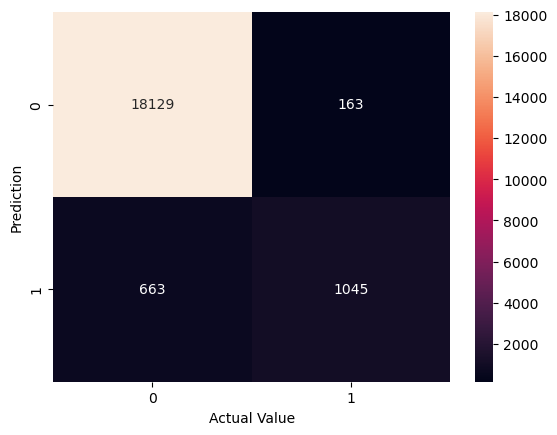

In [57]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

##### The predictive model demonstrates strong overall performance, achieving an accuracy of 95.87%, largely attributed to its high precision and recall on class 0 (non-diabetic cases). However, the dataset exhibits a clear class imbalance, with class 1 (diabetic) representing less than 10% of total cases. While the model shows promising precision for class 1 at 86.5%, indicating that most positive predictions are accurate, its recall is notably lower at 61.2%. This suggests that a significant portion of diabetic cases are going undetected which is a concern because false negatives can lead to critical delays in diagnosis and treatment.

### Random Forest

In [40]:
# Initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)

              precision    recall  f1-score   support

           0    0.97190   0.99656   0.98407     18292
           1    0.94936   0.69145   0.80014      1708

    accuracy                        0.97050     20000
   macro avg    0.96063   0.84400   0.89211     20000
weighted avg    0.96998   0.97050   0.96837     20000



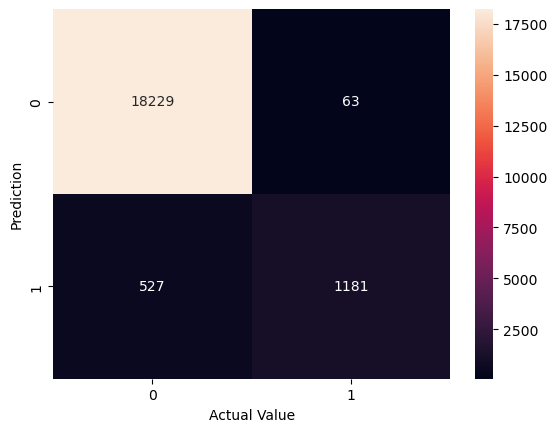

In [41]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

#### The Random Forest classifier significantly enhanced the model's ability to detect diabetic cases while maintaining high overall performance. It achieved an accuracy of 97.05%, with class 0 (non-diabetic) maintaining strong precision and recall (97.2% and 99.7%, respectively). Notably, class 1 (diabetic) saw a marked improvement in recall, rising from 61.2% to 69.1%, and an increase in F1-score from 0.72 to 0.80. This indicates that the model is now better at identifying positive cases and reducing false negatives.

### XGBoost

In [43]:
# Initialize model
model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train model
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate model
report = classification_report(y_test, predictions, digits=5)
matrix = confusion_matrix(y_test, predictions)

print(report)

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/150.0 MB 10.1 MB/s eta 0:00:15
   - -------------------------------------- 5.0/150.0 MB 12.1 MB/s eta 0:00:12
   -- ------------------------------------- 8.9/150.0 MB 14.6 MB/s eta 0:00:10
   --- ------------------------------------ 12.3/150.0 MB 14.9 MB/s eta 0:00:10
   ---- ----------------------------------- 16.0/150.0 MB 15.3 MB/s eta 0:00:09
   ----- ---------------------------------- 19.9/150.0 MB 15.9 MB/s eta 0:00:09
   ------ --------------------------------- 24.4/150.0 MB 16.6 MB/s eta 0:00:08
   ------- -------------------------------- 28.8/150.0 MB 17.1 MB/s eta 0:00:08
   -------- ------------------------------- 32.5/150.0 MB 17.3 MB/s eta 0:00:07
   --------- ------------------------------ 36.2/150.0 MB 17.2 MB/s eta 0:00:07
   ---------- ----------------------------- 40.6/150.0 MB 17.5 MB/s eta 0:00:07
   ------------ --------------------------- 45.1/150

C:\Users\User\anaconda3.12\Lib\site-packages\xgboost\training.py:183: UserWarning: [04:41:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0    0.97243   0.99672   0.98442     18292
           1    0.95204   0.69731   0.80500      1708

    accuracy                        0.97115     20000
   macro avg    0.96223   0.84701   0.89471     20000
weighted avg    0.97068   0.97115   0.96910     20000



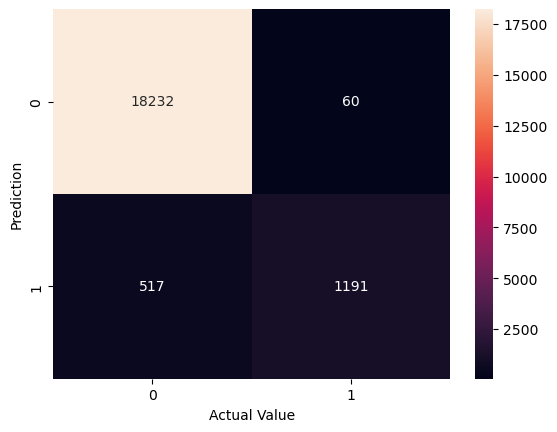

In [44]:
sns.heatmap(matrix, annot=True, fmt="g")
plt.ylabel("Prediction")
plt.xlabel("Actual Value");

### Model Performance Summary:
#### Across all evaluated classifiers, XGBoost demonstrated the most balanced performance, achieving an overall accuracy of 97.12%. Class 0 (non-diabetic) retained very high precision (97.2%) and recall (99.7%), while class 1 (diabetic) achieved precision of 95.2% and recall of 69.7%, slightly outperforming Random Forest in terms of recall and F1-score. These improvements translate into fewer missed positive cases, critical for early detection of diabetes in patient. The macro-averaged F1-score rose to 0.89, indicating stronger class-level parity, while the weighted metrics affirmed the model’s general stability. Compared to Logistic Regression and Random Forest, XGBoost strikes the most effective balance between sensitivity and precision for minority class detection, positioning it as a strong candidate for deployment in Stark Health clinic workflows.

In [66]:
# Lets save our model.

dump(model, "diabetes.joblib")

['diabetes.joblib']